# Data Cleaning
## Jessica Schmidt

## Getting Started: Importing packages, importing csv file, preliminary examination of dataset

In [1]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Import CSV file
med_data = pd.read_csv('/Users/astro/Downloads/medical_raw_data.csv')

In [3]:
# Examine the data types
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [4]:
# Print the header
med_data.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


# Detecting Duplicates

In [5]:
# Detection of duplicates of UID 
# we find that there are no duplicates of UID
uid_duplicates = med_data.duplicated(subset = 'UID', keep = False)

# Print UID column
print(uid_duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [6]:
# Detection of duplicates in dataframe
# We find that there are no duplicates
med_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
print(med_data.duplicated().value_counts())

False    10000
dtype: int64


# Re-Expression of Categorical Variables

In [8]:
# ReAdmis variable
med_data.ReAdmis.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
med_data['ReAdmis_numeric'] = med_data['ReAdmis']
dict_ReAd = {"ReAdmis_numeric": {"Yes": 1, "No": 0}}
med_data.replace(dict_ReAd, inplace=True)
med_data.ReAdmis_numeric.unique()

array([0, 1], dtype=int64)

In [10]:
# Soft_drink variable
med_data.Soft_drink.unique()

array([nan, 'No', 'Yes'], dtype=object)

In [11]:
med_data['Soft_drink_numeric'] = med_data['Soft_drink']
dict_soft = {"Soft_drink_numeric": {"Yes": 1, "No": 0}}
med_data.replace(dict_soft, inplace=True)
med_data.Soft_drink_numeric.unique()

array([nan,  0.,  1.])

In [12]:
# HighBlood variable
med_data.HighBlood.unique()

array(['Yes', 'No'], dtype=object)

In [13]:
med_data['HighBlood_numeric'] = med_data['HighBlood']
dict_HighBlood = {"HighBlood_numeric": {"Yes": 1, "No": 0}}
med_data.replace(dict_HighBlood, inplace=True)
med_data.HighBlood_numeric.unique()

array([1, 0], dtype=int64)

In [14]:
# Stroke variable
med_data.Stroke.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
med_data['Stroke_numeric'] = med_data['Stroke']
dict_Stroke = {"Stroke_numeric": {"Yes": 1, "No": 0}}
med_data.replace(dict_Stroke, inplace=True)
med_data.Stroke_numeric.unique()

array([0, 1], dtype=int64)

In [16]:
# Complication_risk variable
med_data.Complication_risk.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [17]:
med_data['Complication_risk_numeric'] = med_data['Complication_risk']
dict_risk = {"Complication_risk_numeric": {"Low": 1, "Medium": 2, "High": 3}}
med_data.replace(dict_risk, inplace=True)
med_data.Complication_risk_numeric.unique()

array([2, 3, 1], dtype=int64)

In [18]:
# Overweight variable, no re-expression necessary
med_data.Overweight.unique()

array([ 0.,  1., nan])

In [19]:
# Arthritis variable
med_data.Arthritis.unique()

array(['Yes', 'No'], dtype=object)

In [20]:
med_data['Arthritis_numeric'] = med_data['Arthritis']
dict_Arthritis = {"Arthritis_numeric": {"Yes": 1, "No": 0}}
med_data.replace(dict_Arthritis, inplace=True)
med_data.Arthritis_numeric.unique()

array([1, 0], dtype=int64)

In [21]:
# Diabetes variable
med_data.Diabetes.unique()

array(['Yes', 'No'], dtype=object)

In [22]:
med_data['Diabetes_numeric'] = med_data['Diabetes']
dict_Diabetes = {"Diabetes_numeric": {"Yes": 1, "No": 0}}
med_data.replace(dict_Diabetes, inplace=True)
med_data.Diabetes_numeric.unique()

array([1, 0], dtype=int64)

In [23]:
# Hyperlipidemia variable
med_data.Hyperlipidemia.unique()

array(['No', 'Yes'], dtype=object)

In [24]:
med_data['Hyperlipidemia_numeric'] = med_data['Hyperlipidemia']
dict_Hyperlip = {"Hyperlipidemia_numeric": {"Yes": 1, "No": 0}}
med_data.replace(dict_Hyperlip, inplace=True)
med_data.Hyperlipidemia_numeric.unique()

array([0, 1], dtype=int64)

In [25]:
# BackPain variable
med_data.BackPain.unique()

array(['Yes', 'No'], dtype=object)

In [26]:
med_data['BackPain_numeric'] = med_data['BackPain']
dict_BackPain = {"BackPain_numeric": {"Yes": 1, "No": 0}}
med_data.replace(dict_BackPain, inplace=True)
med_data.BackPain_numeric.unique()

array([1, 0], dtype=int64)

In [27]:
# Anxiety variable, no re-expression necessary
med_data.Anxiety.unique()

array([ 1., nan,  0.])

In [28]:
# Allergic_rhinitis variable
med_data.Allergic_rhinitis.unique()

array(['Yes', 'No'], dtype=object)

In [29]:
med_data['Allergic_rhinitis_numeric'] = med_data['Allergic_rhinitis']
dict_Allergic = {"Allergic_rhinitis_numeric": {"Yes": 1, "No": 0}}
med_data.replace(dict_Allergic, inplace=True)
med_data.Allergic_rhinitis_numeric.unique()

array([1, 0], dtype=int64)

In [30]:
# Reflux_esophagitis variable
med_data.Reflux_esophagitis.unique()

array(['No', 'Yes'], dtype=object)

In [31]:
med_data['Reflux_esophagitis_numeric'] = med_data['Reflux_esophagitis']
dict_Reflux = {"Reflux_esophagitis_numeric": {"Yes": 1, "No": 0}}
med_data.replace(dict_Reflux, inplace=True)
med_data.Reflux_esophagitis_numeric.unique()

array([0, 1], dtype=int64)

In [32]:
# Asthma variable
med_data.Asthma.unique()

array(['Yes', 'No'], dtype=object)

In [33]:
med_data['Asthma_numeric'] = med_data['Asthma']
dict_Asthma = {"Asthma_numeric": {"Yes": 1, "No": 0}}
med_data.replace(dict_Asthma, inplace=True)
med_data.Asthma_numeric.unique()

array([1, 0], dtype=int64)

# Detecting Missingness

In [34]:
# Detection of missing data
med_data.isnull().sum()

Unnamed: 0                    0
CaseOrder                     0
Customer_id                   0
Interaction                   0
UID                           0
                             ..
Hyperlipidemia_numeric        0
BackPain_numeric              0
Allergic_rhinitis_numeric     0
Reflux_esophagitis_numeric    0
Asthma_numeric                0
Length: 65, dtype: int64

(array([1880., 1858., 1094., 1113.,  739.,  126.,  145.,  154.,  157.,
         146.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

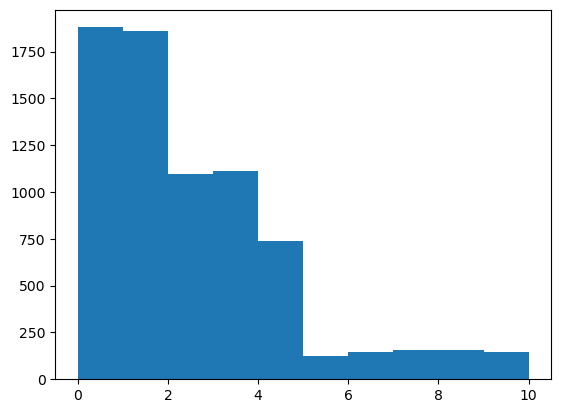

In [35]:
# Children Variable Step 1: Examining distribution
# Positively skewed, skewed right
# Will use value of 0 for imputation based on NA answer; potentially MNAR
plt.hist(med_data['Children'])

In [36]:
# Children Variable Step 2: Performing imputation of 0
med_data['Children'].fillna((0), inplace=True)

In [37]:
# Children Variable Step 3: Verifying that missing values were imputed
med_data['Children'].isnull().sum()

0

(array([4468., 1858., 1094., 1113.,  739.,  126.,  145.,  154.,  157.,
         146.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

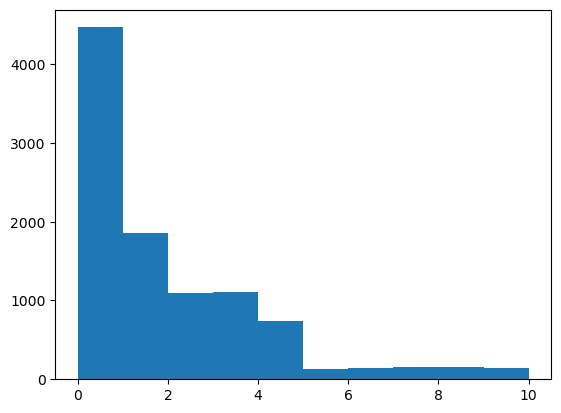

In [38]:
# Children Variable Step 4: Verifying distribution post imputation
plt.hist(med_data['Children'])

(array([823., 761., 746., 753., 746., 739., 730., 765., 710., 813.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

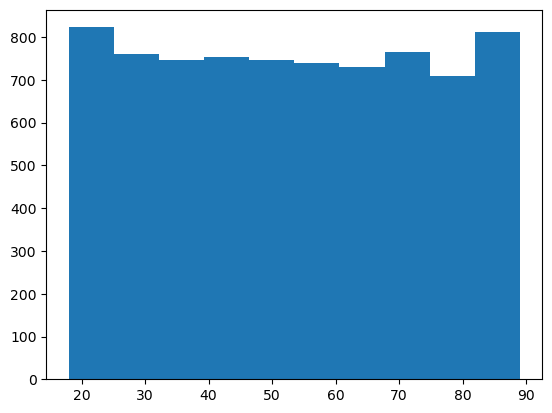

In [39]:
# Age Variable Step 1: Examining distribution
# Uniform distribution, equally spread, no significant peaks
# Will use mean for imputation based on distribution
plt.hist(med_data['Age'])

In [40]:
# Age Variable Step 2: Performing imputation of mean
med_data['Age'].fillna(med_data['Age'].mean(), inplace=True)

In [41]:
# Age Variable Step 3: Verifying that missing values were imputed
med_data['Age'].isnull().sum()

0

(array([ 823.,  761.,  746.,  753., 3160.,  739.,  730.,  765.,  710.,
         813.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

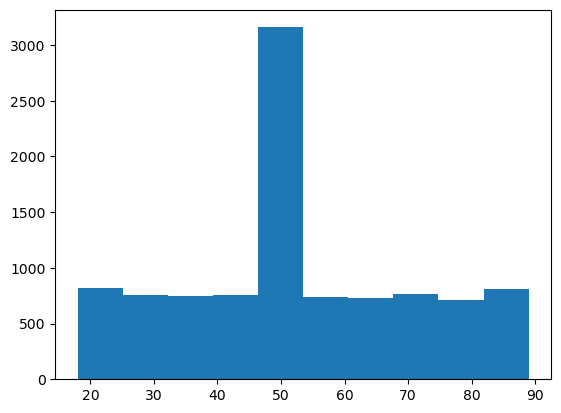

In [42]:
# Age Variable Step 4: Verifying distribution post imputation
plt.hist(med_data['Age'])

(array([2068., 2526., 1532.,  790.,  340.,  156.,   67.,   34.,   12.,
          11.]),
 array([1.54080000e+02, 2.08635850e+04, 4.15730900e+04, 6.22825950e+04,
        8.29921000e+04, 1.03701605e+05, 1.24411110e+05, 1.45120615e+05,
        1.65830120e+05, 1.86539625e+05, 2.07249130e+05]),
 <BarContainer object of 10 artists>)

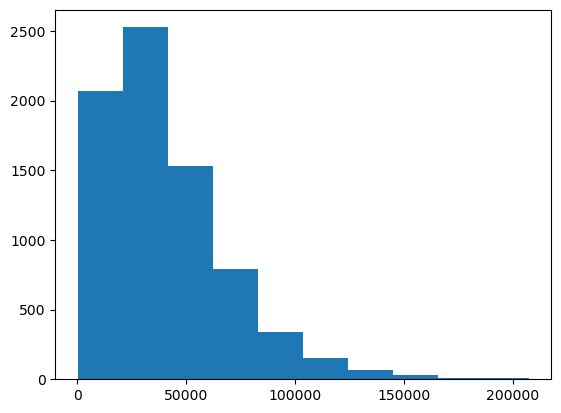

In [43]:
# Income Variable Step 1: Examining the Distribution
# Positively skewed, skewed right
# Will use median for imputation based on distribution
plt.hist(med_data['Income'])

In [44]:
# Income Variable Step 2: Performing imputation of median
med_data['Income'].fillna(med_data['Income'].median(), inplace=True)

In [45]:
# Income Variable Step 3: Verifying that missing values were imputed
med_data['Income'].isnull().sum()

0

(array([2068., 4990., 1532.,  790.,  340.,  156.,   67.,   34.,   12.,
          11.]),
 array([1.54080000e+02, 2.08635850e+04, 4.15730900e+04, 6.22825950e+04,
        8.29921000e+04, 1.03701605e+05, 1.24411110e+05, 1.45120615e+05,
        1.65830120e+05, 1.86539625e+05, 2.07249130e+05]),
 <BarContainer object of 10 artists>)

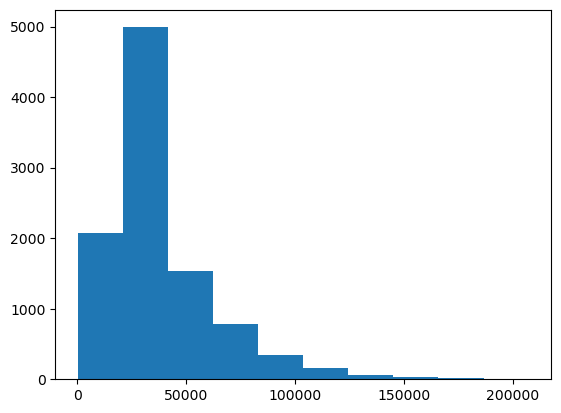

In [46]:
# Income Variable Step 4: Verifying distribution post imputation
plt.hist(med_data['Income'])

In [47]:
print(med_data['Soft_drink'])

0       NaN
1        No
2        No
3        No
4       Yes
       ... 
9995     No
9996     No
9997    Yes
9998     No
9999     No
Name: Soft_drink, Length: 10000, dtype: object


(array([5589.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1944.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

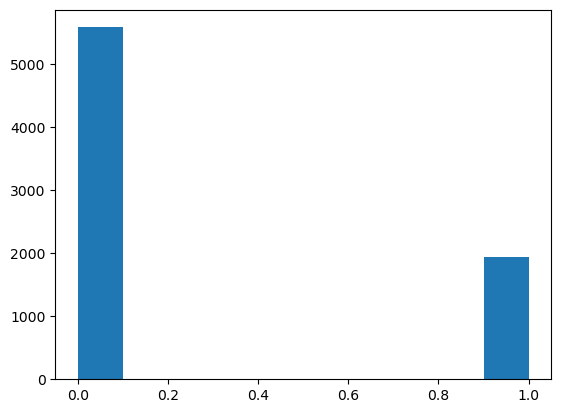

In [48]:
# Soft_drink Variable Step 1: Examining the Distribution
# 0 is mode
# Will impute value of 0
plt.hist(med_data['Soft_drink_numeric'])

In [49]:
# Soft_drink Variable Step 2: Performing imputation of 0
med_data['Soft_drink'].fillna('No', inplace=True)
med_data['Soft_drink_numeric'].fillna((0), inplace=True)

In [50]:
# Soft_drink Variable Step 3: Verifying that missing values were imputed
med_data['Soft_drink'].isnull().sum()

0

In [51]:
# Soft_drink Variable Step 4: Verifying distribution post imputation
print(med_data['Soft_drink'])

0        No
1        No
2        No
3        No
4       Yes
       ... 
9995     No
9996     No
9997    Yes
9998     No
9999     No
Name: Soft_drink, Length: 10000, dtype: object


In [52]:
# Ensuring Yes and No values are mapped to 1 and 0, respectively, for Overweight variable
print(med_data['Overweight'])

0       0.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
9995    NaN
9996    1.0
9997    1.0
9998    1.0
9999    1.0
Name: Overweight, Length: 10000, dtype: float64


(array([2623.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6395.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

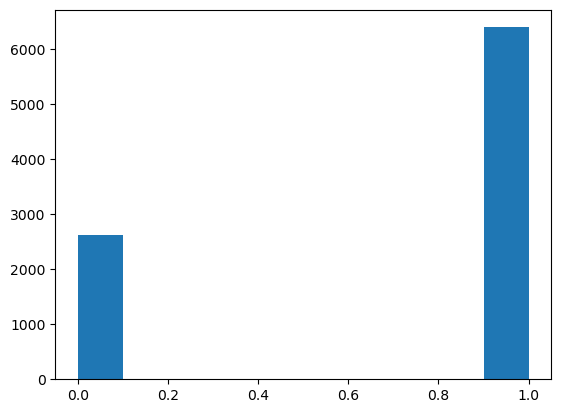

In [53]:
# Overweight Variable Step 1: Examining the distribution
# 1 is mode
# Will impute value of 1, also potentially MNAR
plt.hist(med_data['Overweight'])

In [54]:
# Overweight Variable Step 2: Performing imputation of 1
med_data['Overweight'].fillna((1), inplace=True)

In [55]:
# Overweight Variable Step 3: Verifying that missing values were imputed
med_data['Overweight'].isnull().sum()

0

(array([2623.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7377.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

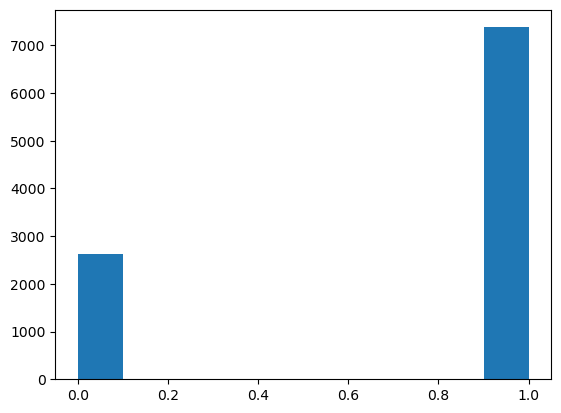

In [56]:
# Overweight Variable Step 4: Verifying distribution post imputation
plt.hist(med_data['Overweight'])

(array([6110.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2906.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

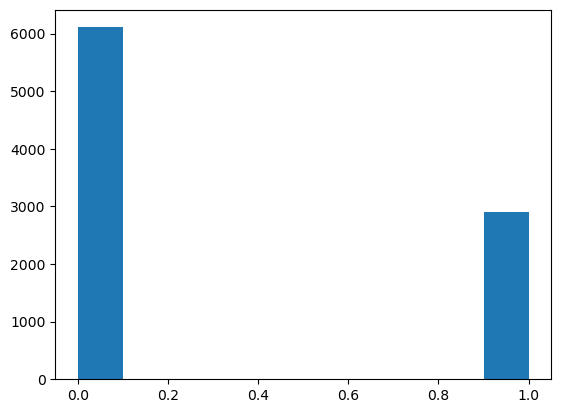

In [57]:
# Anxiety Variable Step 1: Examining the distribution
# 0 is mode
# Will impute value of 0, also potentially MNAR
plt.hist(med_data['Anxiety'])

In [58]:
# Anxiety Variable Step 2: Performing imputation of 0
med_data['Anxiety'].fillna((0), inplace=True)

In [59]:
# Anxiety Variable Step 3: Verifying that missing values were imputed
med_data['Anxiety'].isnull().sum()

0

(array([7094.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2906.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

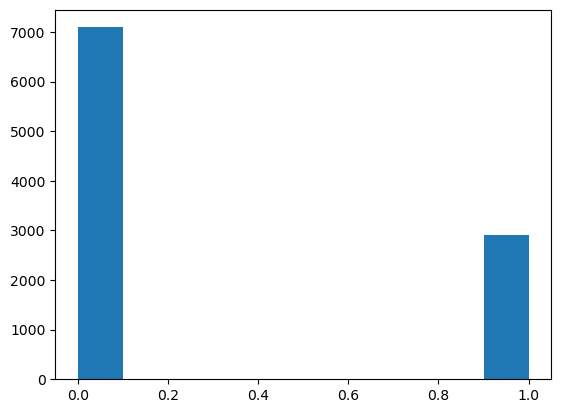

In [60]:
# Anxiety Variable Step 4: Verifying distribution post imputation
plt.hist(med_data['Anxiety'])

(array([2288., 1429.,  599.,  134.,   32.,  235.,  502.,  916., 1314.,
        1495.]),
 array([ 1.00198092,  8.09993146, 15.197882  , 22.29583253, 29.39378307,
        36.49173361, 43.58968415, 50.68763469, 57.78558522, 64.88353576,
        71.9814863 ]),
 <BarContainer object of 10 artists>)

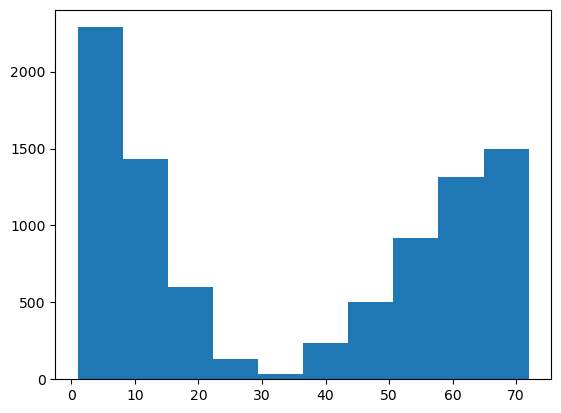

In [61]:
# Initial_days variable Step 1: Examining the distribution
# Bimodal distribution, non-symmetric
# Will impute median based on distribution
plt.hist(med_data['Initial_days'])

In [62]:
# Initial_days Variable Step 2: Performing imputation of median
med_data['Initial_days'].fillna(med_data['Initial_days'].median(), inplace=True)

In [63]:
# Initial_days Variable Step 3: Verifying that missing values were imputed
med_data['Initial_days'].isnull().sum()

0

(array([2288., 1429.,  599.,  134., 1088.,  235.,  502.,  916., 1314.,
        1495.]),
 array([ 1.00198092,  8.09993146, 15.197882  , 22.29583253, 29.39378307,
        36.49173361, 43.58968415, 50.68763469, 57.78558522, 64.88353576,
        71.9814863 ]),
 <BarContainer object of 10 artists>)

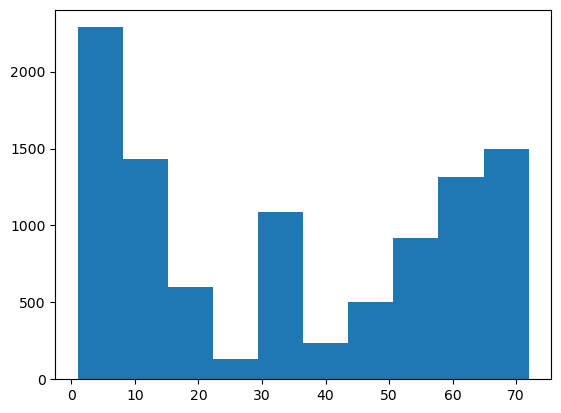

In [64]:
# Initial_days Variable Step 4: Verifying distribution post imputation
plt.hist(med_data['Initial_days'])

# Detecting Outliers

In [65]:
# Examining outliers for Population variable
# Outliers are present and will be retained
med_data['z_score_population']=stats.zscore(med_data['Population'])
med_data[['Population','z_score_population']].head

<bound method NDFrame.head of       Population  z_score_population
0           2951           -0.473168
1          11303            0.090242
2          17125            0.482983
3           2162           -0.526393
4           5287           -0.315586
...          ...                 ...
9995        4762           -0.351002
9996        1251           -0.587847
9997         532           -0.636349
9998         271           -0.653956
9999       41524            2.128893

[10000 rows x 2 columns]>

(array([7.328e+03, 1.203e+03, 7.630e+02, 3.950e+02, 1.860e+02, 7.500e+01,
        2.600e+01, 1.800e+01, 4.000e+00, 2.000e+00]),
 array([-0.67223706,  0.15624281,  0.98472269,  1.81320256,  2.64168243,
         3.4701623 ,  4.29864217,  5.12712205,  5.95560192,  6.78408179,
         7.61256166]),
 <BarContainer object of 10 artists>)

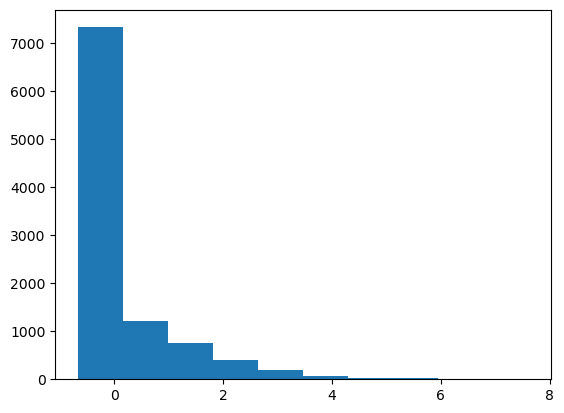

In [66]:
plt.hist(med_data['z_score_population'])

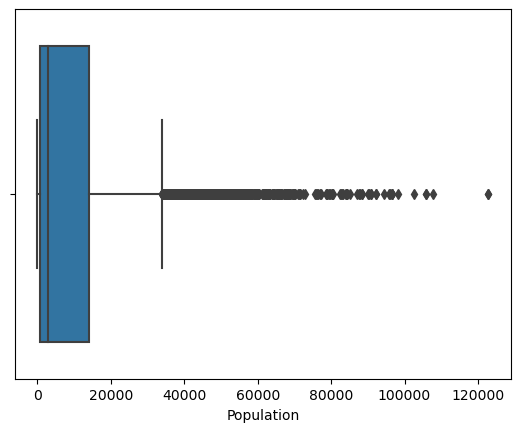

In [67]:
boxplot=sns.boxplot(x='Population',data=med_data)

In [68]:
# Examining outliers for Children variable
# Outliers are present and will be retained
med_data['z_score_children']=stats.zscore(med_data['Children'])
med_data[['Children','z_score_children']].head

<bound method NDFrame.head of       Children  z_score_children
0          1.0         -0.268130
1          3.0          0.697755
2          3.0          0.697755
3          0.0         -0.751072
4          0.0         -0.751072
...        ...               ...
9995       0.0         -0.751072
9996       4.0          1.180697
9997       3.0          0.697755
9998       3.0          0.697755
9999       8.0          3.112467

[10000 rows x 2 columns]>

(array([4468., 2952.,    0., 1852.,  126.,  145.,  154.,  157.,   83.,
          63.]),
 array([-0.75107187, -0.26812957,  0.21481274,  0.69775504,  1.18069735,
         1.66363965,  2.14658196,  2.62952427,  3.11246657,  3.59540888,
         4.07835118]),
 <BarContainer object of 10 artists>)

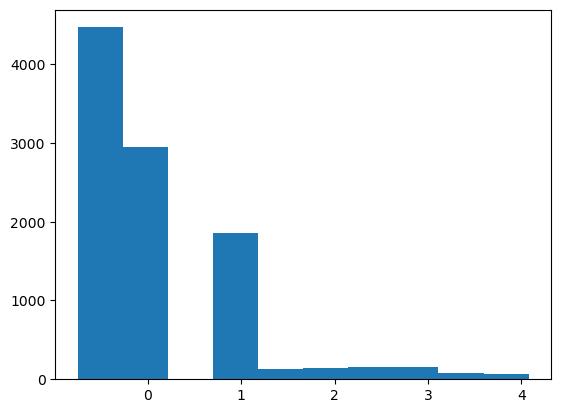

In [69]:
plt.hist(med_data['z_score_children'])

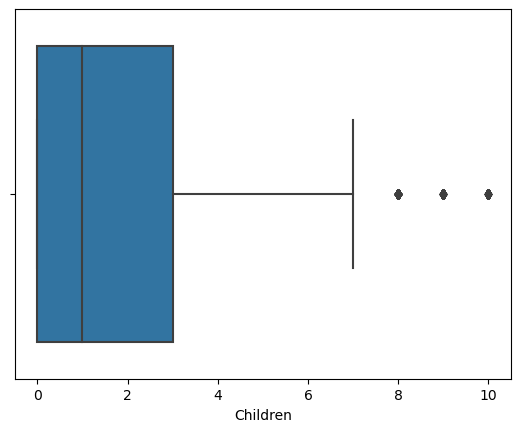

In [70]:
boxplot=sns.boxplot(x='Children',data=med_data)

In [71]:
# Examining outliers for Age variable
# No outliers present
med_data['z_score_age']=stats.zscore(med_data['Age'])
med_data[['Age','z_score_age']].head

<bound method NDFrame.head of             Age   z_score_age
0     53.000000 -1.643333e-02
1     51.000000 -1.275909e-01
2     53.000000 -1.643333e-02
3     78.000000  1.373036e+00
4     22.000000 -1.739376e+00
...         ...           ...
9995  25.000000 -1.572639e+00
9996  87.000000  1.873245e+00
9997  53.295676  3.949110e-16
9998  43.000000 -5.722212e-01
9999  53.295676  3.949110e-16

[10000 rows x 2 columns]>

(array([ 823.,  761.,  746.,  753., 3160.,  739.,  730.,  765.,  710.,
         813.]),
 array([-1.96169093, -1.56708153, -1.17247213, -0.77786273, -0.38325333,
         0.01135607,  0.40596547,  0.80057486,  1.19518426,  1.58979366,
         1.98440306]),
 <BarContainer object of 10 artists>)

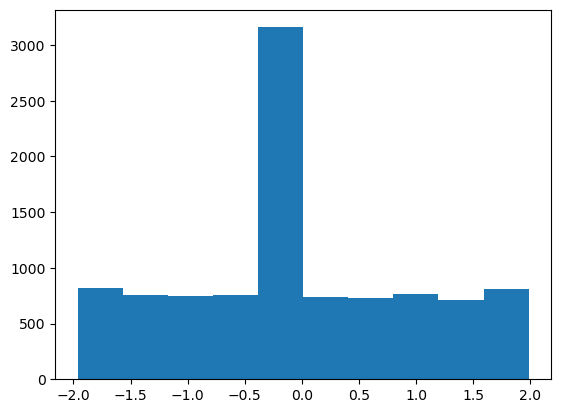

In [72]:
plt.hist(med_data['z_score_age'])

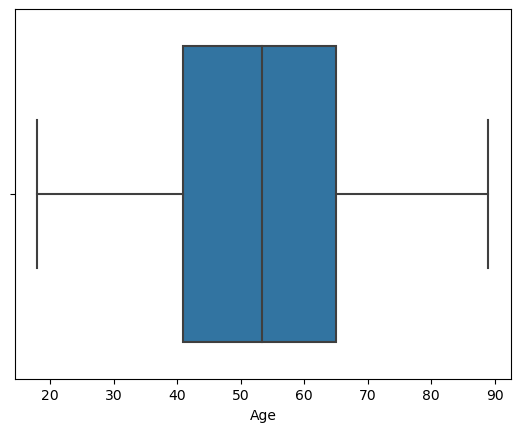

In [73]:
boxplot=sns.boxplot(x='Age',data=med_data)

In [74]:
# Examining outliers for Income variable
# Outliers are present and will be retained
med_data['z_score_income']=stats.zscore(med_data['Income'])
med_data[['Income','z_score_income']].head

<bound method NDFrame.head of         Income  z_score_income
0     86575.93        1.904974
1     46805.99        0.316815
2     14370.14       -0.978466
3     39741.49        0.034704
4      1209.56       -1.504016
...        ...             ...
9995  45967.61        0.283336
9996  14983.02       -0.953992
9997  65917.81        1.080020
9998  29702.32       -0.366197
9999  62682.63        0.950827

[10000 rows x 2 columns]>

(array([2068., 4990., 1532.,  790.,  340.,  156.,   67.,   34.,   12.,
          11.]),
 array([-1.54616546, -0.71915955,  0.10784637,  0.93485228,  1.76185819,
         2.5888641 ,  3.41587002,  4.24287593,  5.06988184,  5.89688776,
         6.72389367]),
 <BarContainer object of 10 artists>)

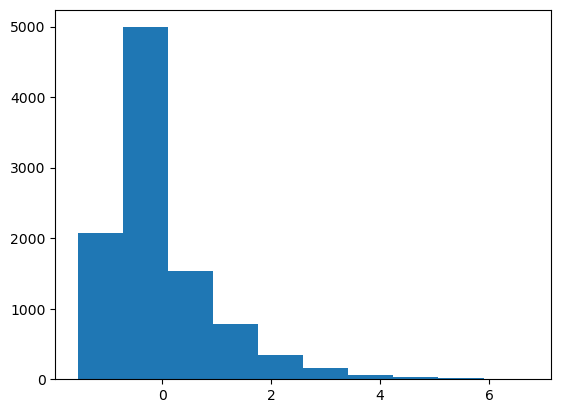

In [75]:
plt.hist(med_data['z_score_income'])

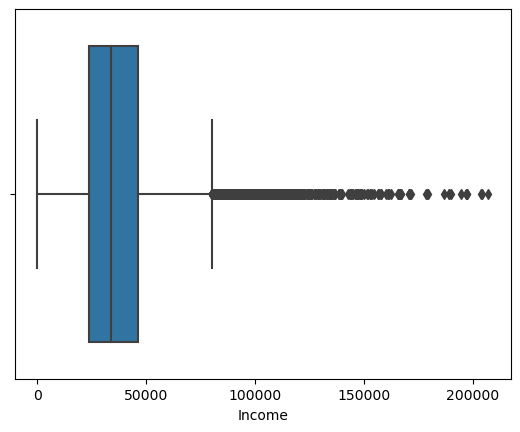

In [76]:
boxplot=sns.boxplot(x='Income',data=med_data)

In [77]:
# Examining outliers for VitD_levels variable
# Outliers are present and will be retained
med_data['z_score_vitd']=stats.zscore(med_data['VitD_levels'])
med_data[['VitD_levels','z_score_vitd']].head

<bound method NDFrame.head of       VitD_levels  z_score_vitd
0       17.802330     -0.239530
1       18.994640     -0.062181
2       17.415889     -0.297011
3       17.420079     -0.296388
4       16.870524     -0.378131
...           ...           ...
9995    16.481612     -0.435979
9996    18.451601     -0.142954
9997    15.752751     -0.544393
9998    21.956305      0.378351
9999    20.421883      0.150114

[10000 rows x 2 columns]>

(array([ 313., 4930., 4063.,  194.,    0.,    0.,    0.,   49.,  329.,
         122.]),
 array([-1.47162731, -0.8245874 , -0.17754748,  0.46949244,  1.11653235,
         1.76357227,  2.41061218,  3.0576521 ,  3.70469201,  4.35173193,
         4.99877184]),
 <BarContainer object of 10 artists>)

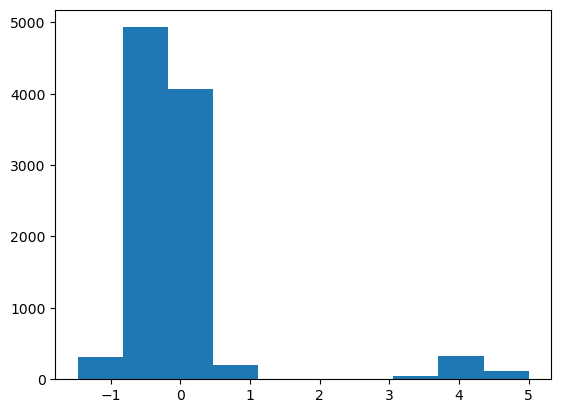

In [78]:
plt.hist(med_data['z_score_vitd'])

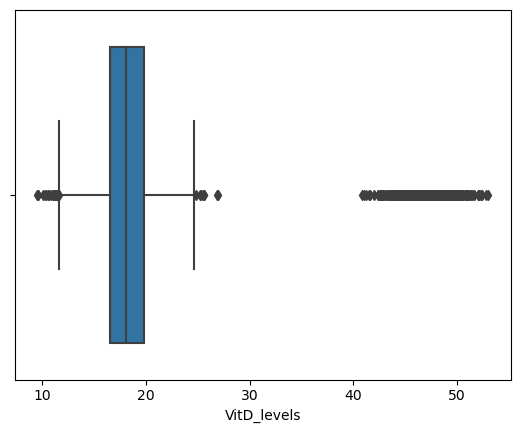

In [79]:
boxplot=sns.boxplot(x='VitD_levels',data=med_data)

In [80]:
# Examining outliers via z-scores for Doc_visits variable
# No outliers present
med_data['z_score_doc_visits']=stats.zscore(med_data['Doc_visits'])
med_data[['Doc_visits','z_score_doc_visits']].head

<bound method NDFrame.head of       Doc_visits  z_score_doc_visits
0              6            0.944647
1              4           -0.967981
2              4           -0.967981
3              4           -0.967981
4              5           -0.011667
...          ...                 ...
9995           4           -0.967981
9996           5           -0.011667
9997           4           -0.967981
9998           5           -0.011667
9999           5           -0.011667

[10000 rows x 2 columns]>

(array([6.000e+00, 5.800e+01, 5.950e+02, 2.385e+03, 0.000e+00, 3.823e+03,
        2.436e+03, 6.340e+02, 6.100e+01, 2.000e+00]),
 array([-3.83692119, -3.07187036, -2.30681952, -1.54176869, -0.77671786,
        -0.01166703,  0.75338381,  1.51843464,  2.28348547,  3.04853631,
         3.81358714]),
 <BarContainer object of 10 artists>)

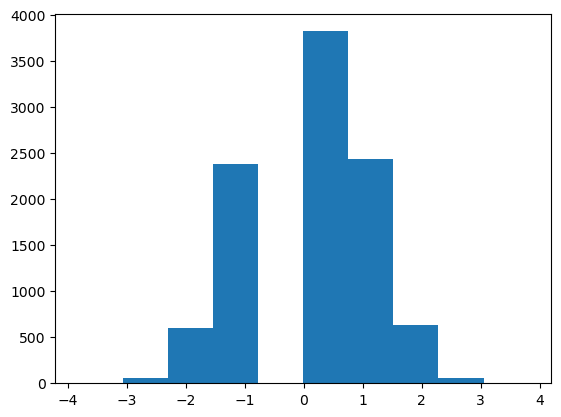

In [81]:
plt.hist(med_data['z_score_doc_visits'])

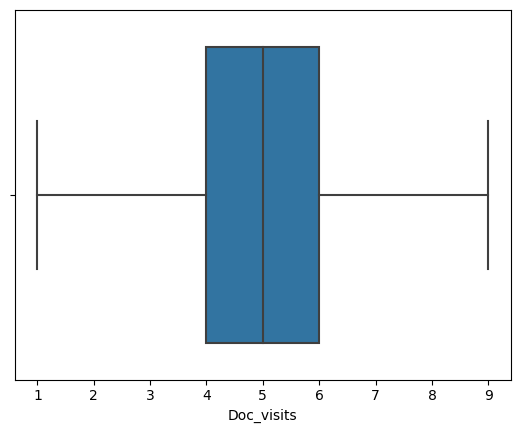

In [82]:
boxplot=sns.boxplot(x='Doc_visits',data=med_data)

In [83]:
# Examining outliers for Full_meals_eaten variable
# Outliers are present and will be retained
med_data['z_score_meals']=stats.zscore(med_data['Full_meals_eaten'])
med_data[['Full_meals_eaten','z_score_meals']].head

<bound method NDFrame.head of       Full_meals_eaten  z_score_meals
0                    0      -0.993387
1                    2       0.990609
2                    1      -0.001389
3                    1      -0.001389
4                    0      -0.993387
...                ...            ...
9995                 2       0.990609
9996                 0      -0.993387
9997                 2       0.990609
9998                 2       0.990609
9999                 0      -0.993387

[10000 rows x 2 columns]>

(array([3.715e+03, 3.615e+03, 1.856e+03, 0.000e+00, 6.120e+02, 1.690e+02,
        0.000e+00, 2.500e+01, 6.000e+00, 2.000e+00]),
 array([-0.99338686, -0.29898822,  0.39541043,  1.08980907,  1.78420771,
         2.47860636,  3.173005  ,  3.86740364,  4.56180229,  5.25620093,
         5.95059957]),
 <BarContainer object of 10 artists>)

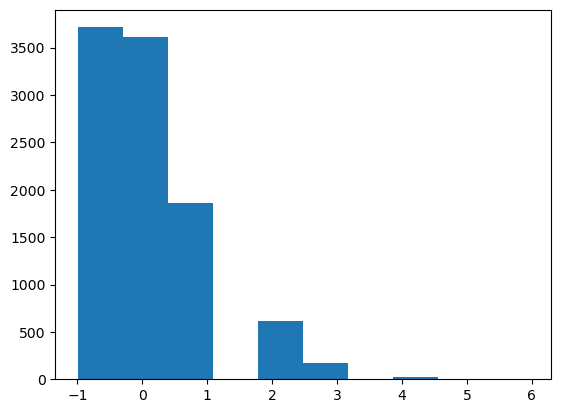

In [84]:
plt.hist(med_data['z_score_meals'])

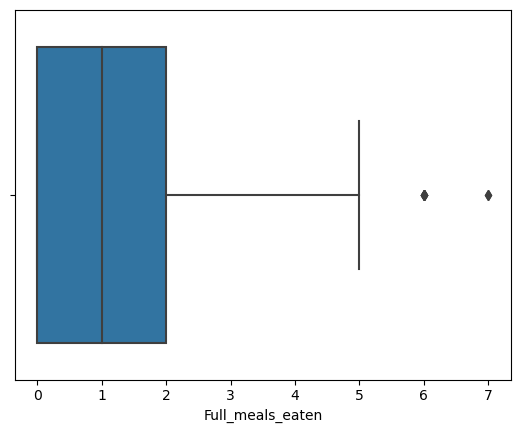

In [85]:
boxplot=sns.boxplot(x='Full_meals_eaten',data=med_data)

In [86]:
# Examining outliers for VitD_supp variable
# Outliers are present and will be retained
med_data['z_score_vitd_supp']=stats.zscore(med_data['VitD_supp'])
med_data[['VitD_supp','z_score_vitd_supp']].head

<bound method NDFrame.head of       VitD_supp  z_score_vitd_supp
0             0          -0.634713
1             1           0.956445
2             0          -0.634713
3             0          -0.634713
4             2           2.547602
...         ...                ...
9995          1           0.956445
9996          0          -0.634713
9997          0          -0.634713
9998          1           0.956445
9999          1           0.956445

[10000 rows x 2 columns]>

(array([6.702e+03, 2.684e+03, 0.000e+00, 5.440e+02, 0.000e+00, 0.000e+00,
        6.400e+01, 0.000e+00, 5.000e+00, 1.000e+00]),
 array([-0.63471264,  0.160866  ,  0.95644465,  1.75202329,  2.54760193,
         3.34318058,  4.13875922,  4.93433787,  5.72991651,  6.52549516,
         7.3210738 ]),
 <BarContainer object of 10 artists>)

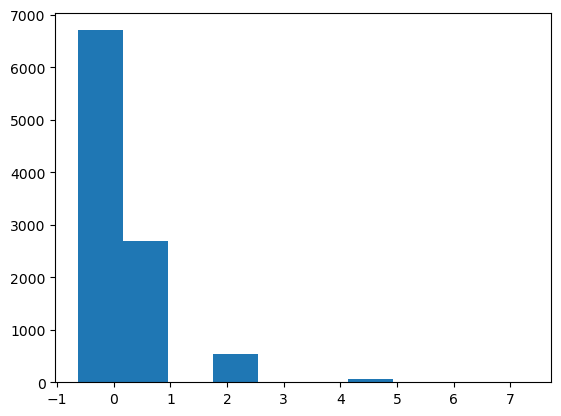

In [87]:
plt.hist(med_data['z_score_vitd_supp'])

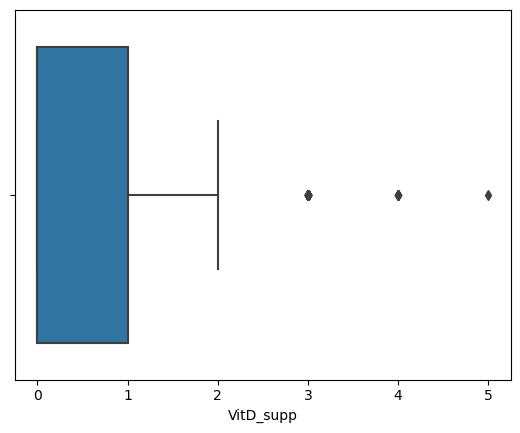

In [88]:
boxplot=sns.boxplot(x='VitD_supp',data=med_data)

In [89]:
# Examining outliers for Initial_days variable
# No outliers present
med_data['z_score_initial_days']=stats.zscore(med_data['Initial_days'])
med_data[['Initial_days','z_score_initial_days']].head

<bound method NDFrame.head of       Initial_days  z_score_initial_days
0        10.585770             -0.959326
1        15.129562             -0.776544
2         4.772177             -1.193189
3         1.714879             -1.316175
4         1.254807             -1.334682
...            ...                   ...
9995     51.561217              0.688989
9996     68.668237              1.377151
9997     34.446941              0.000535
9998     63.356903              1.163493
9999     70.850592              1.464941

[10000 rows x 2 columns]>

(array([2288., 1429.,  599.,  134., 1088.,  235.,  502.,  916., 1314.,
        1495.]),
 array([-1.34485234, -1.05932382, -0.7737953 , -0.48826677, -0.20273825,
         0.08279028,  0.3683188 ,  0.65384732,  0.93937585,  1.22490437,
         1.51043289]),
 <BarContainer object of 10 artists>)

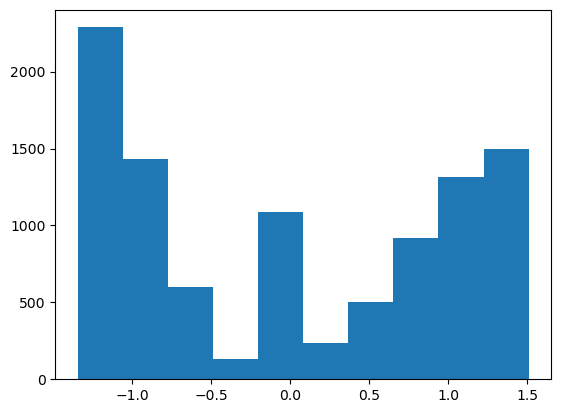

In [90]:
plt.hist(med_data['z_score_initial_days'])

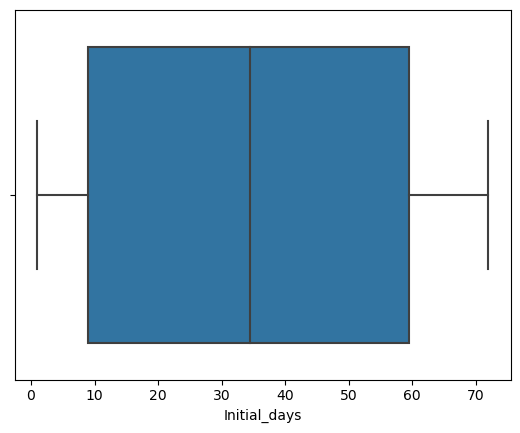

In [91]:
boxplot=sns.boxplot(x='Initial_days',data=med_data)

In [92]:
# Examining outliers for Additional_charges variable
# Outliers are present and will be retained
med_data['z_score_charges']=stats.zscore(med_data['Additional_charges'])
med_data[['Additional_charges','z_score_charges']].head

<bound method NDFrame.head of       Additional_charges  z_score_charges
0           17939.403420         0.765005
1           17612.998120         0.715114
2           17505.192460         0.698635
3           12993.437350         0.009004
4            3716.525786        -1.408991
...                  ...              ...
9995         8927.642189        -0.612461
9996        28507.147340         2.380307
9997        15281.214660         0.358696
9998         7781.678412        -0.787624
9999        11643.189930        -0.197384

[10000 rows x 2 columns]>

(array([1120., 1818., 1891., 1856., 1032.,  497.,  494.,  507.,  487.,
         298.]),
 array([-1.49929906, -1.0798674 , -0.66043573, -0.24100407,  0.1784276 ,
         0.59785926,  1.01729092,  1.43672259,  1.85615425,  2.27558592,
         2.69501758]),
 <BarContainer object of 10 artists>)

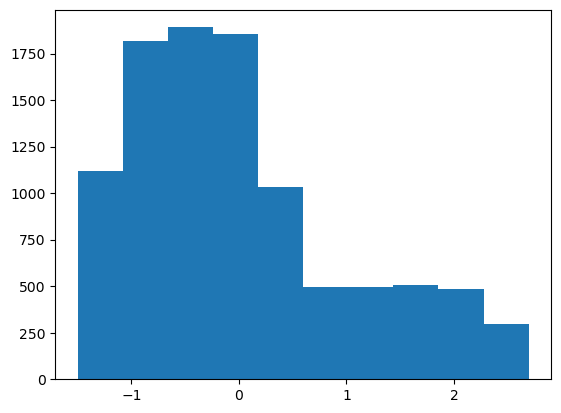

In [93]:
plt.hist(med_data['z_score_charges'])

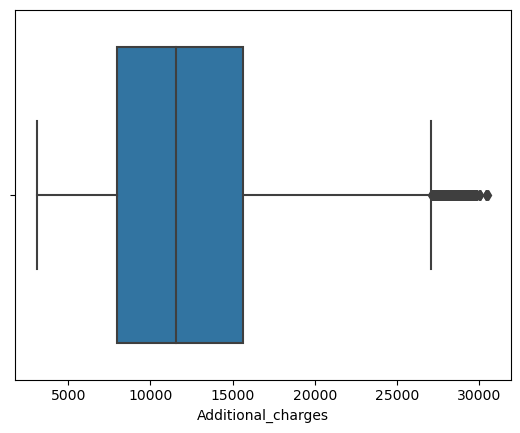

In [94]:
boxplot=sns.boxplot(x='Additional_charges',data=med_data)

# Performing PCA

In [95]:
med_pca = med_data[['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'Additional_charges']]

In [96]:
med_pca_normalized = (med_pca-med_pca.mean())/med_pca.std()

In [97]:
pca = PCA(n_components=med_pca.shape[1])

In [98]:
pca.fit(med_pca_normalized)

PCA(n_components=10)

In [99]:
med_pca2 = pd.DataFrame(pca.transform(med_pca_normalized),columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [100]:
loadings = pd.DataFrame(pca.components_.T,
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'],
index = med_pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Population,-0.021978,0.493564,0.040128,-0.189645,-0.027483,0.540261,0.302677,0.283016,0.503846,-0.011195
Children,0.010953,0.090238,0.015947,-0.438647,0.832287,0.109107,-0.247519,-0.159293,-0.087934,-0.009677
Age,0.705697,0.012460,-0.020764,-0.023898,-0.026846,-0.008225,0.001184,0.019288,-0.008660,-0.706822
Income,-0.006626,0.100040,0.640854,-0.076414,0.166791,-0.450780,0.328259,0.462771,-0.142932,-0.007255
VitD_levels,0.039149,0.023692,0.142290,0.749761,0.318396,0.435943,-0.088271,0.212296,-0.266894,0.001724
Doc_visits,0.011542,0.122116,0.644647,-0.134422,-0.289445,0.327908,-0.067050,-0.544777,-0.242291,-0.005547
Full_meals_eaten,0.033956,-0.512235,0.126591,0.165812,0.273130,0.039335,0.563712,-0.373520,0.399273,-0.009425
VitD_supp,0.017850,0.464538,0.140967,0.384045,0.106306,-0.418935,-0.301132,-0.313253,0.490795,-0.005344
Initial_days,0.003115,0.494304,-0.339552,0.094353,0.082091,-0.135344,0.564469,-0.316342,-0.432996,0.014684
Additional_charges,0.705832,0.009852,0.001188,-0.033415,-0.014481,-0.001122,-0.000839,0.020765,0.013426,0.706940


In [101]:
cov_matrix = np.dot(med_pca_normalized.T, med_pca_normalized) / med_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

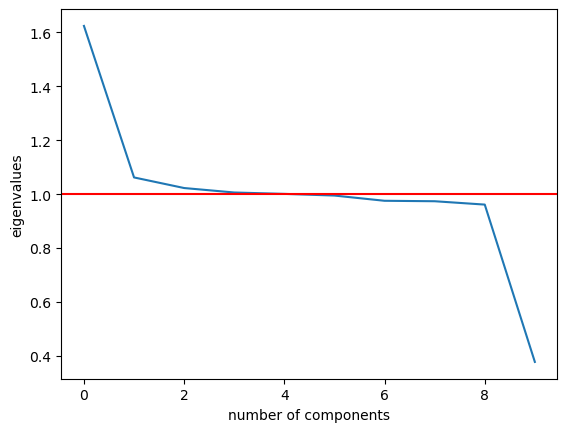

In [102]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color="red")
plt.show()

In [103]:
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  10000 non-null  int64  
 1   CaseOrder                   10000 non-null  int64  
 2   Customer_id                 10000 non-null  object 
 3   Interaction                 10000 non-null  object 
 4   UID                         10000 non-null  object 
 5   City                        10000 non-null  object 
 6   State                       10000 non-null  object 
 7   County                      10000 non-null  object 
 8   Zip                         10000 non-null  int64  
 9   Lat                         10000 non-null  float64
 10  Lng                         10000 non-null  float64
 11  Population                  10000 non-null  int64  
 12  Area                        10000 non-null  object 
 13  Timezone                    1000

In [104]:
 med_data.to_csv('/Users/astro/Downloads/medical_cleaned_data.csv') 